In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D, Embedding, Reshape

In [ ]:
drive.mount('/content/drive')

In [26]:

df_train = pd.read_csv('/content/drive/MyDrive/project/extended_selected_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/project/extended_selected_test.csv')
print(df_train.shape)
print(df_test.shape)


(28391, 786)
(7288, 786)


In [38]:
#Drop the last column
train_df = df_train.drop(df_train.columns[-1], axis=1)
test_df = df_test.drop(df_test.columns[-1], axis=1)

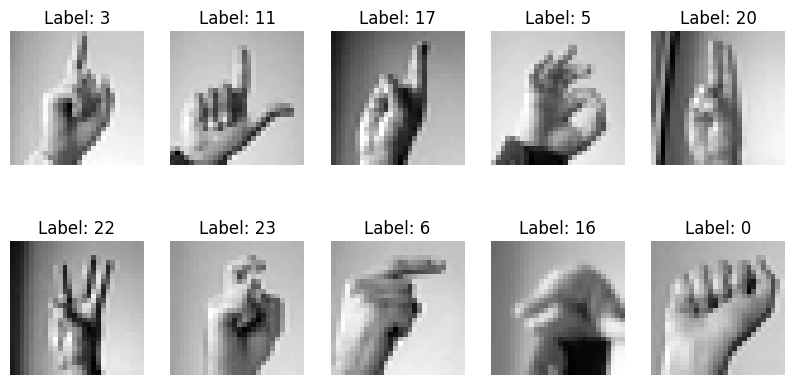

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Extract labels and pixel values
labels = train_df["label"].values
images = train_df.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to 28x28 images

# Display some random images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(images))  # Random index
    axes[i].imshow(images[idx], cmap="gray")
    axes[i].set_title(f"Label: {labels[idx]}")
    axes[i].axis("off")

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.0392 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.0398 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.0409 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.0405 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.0420 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.0384 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.0389 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.0404 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 9/

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

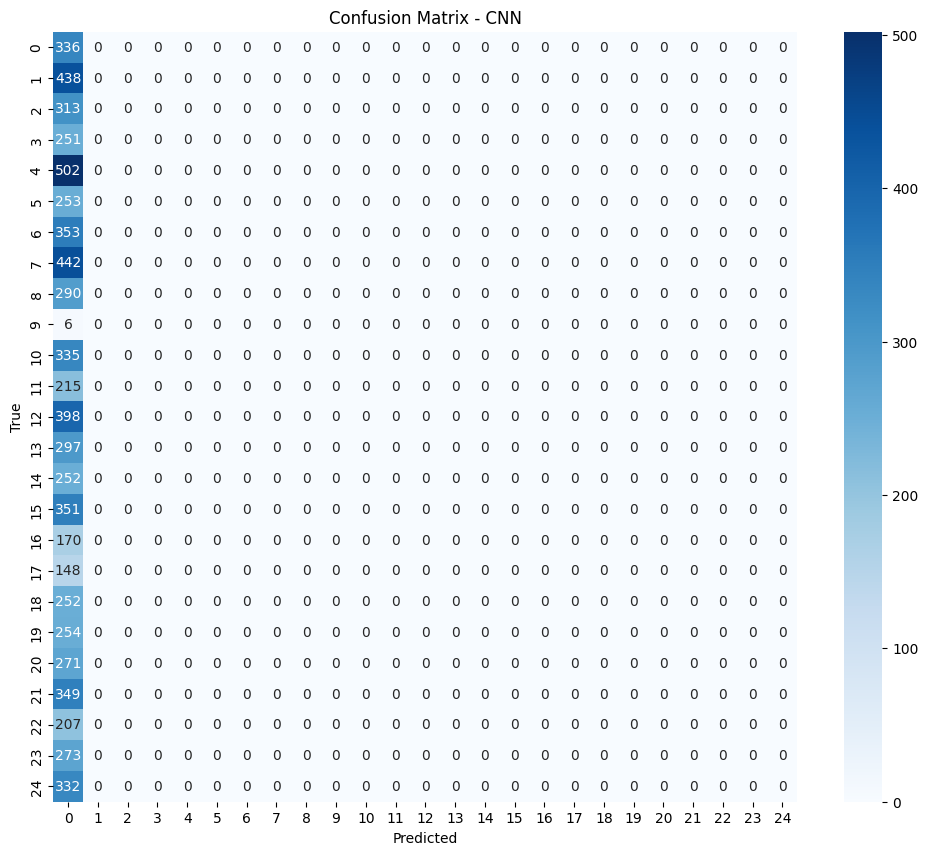

In [30]:

#=====================CNN==========================================


# Extract features and labels
X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

# One-hot encode labels
num_classes = 25 #[0-24] excluding j and z
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #relu any negative becomes zero
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.8943 - loss: 0.3640
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9845 - loss: 0.0520
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9897 - loss: 0.0337
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1231 - loss: 3.0451 - val_accuracy: 0.4768 - val_loss: 2.4000
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3581 - loss: 2.3877 - val_accuracy: 0.5549 - val_loss: 2.0635
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4295 - loss: 2.1204 - val_accuracy: 0.5863 - val_loss: 1.8740
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4678 - loss: 1.9838 - val_accuracy: 0.6183 - val_loss: 1.7505
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4783 - loss: 1.8996 - val_accuracy: 0.6313 - val_loss: 1.6594
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


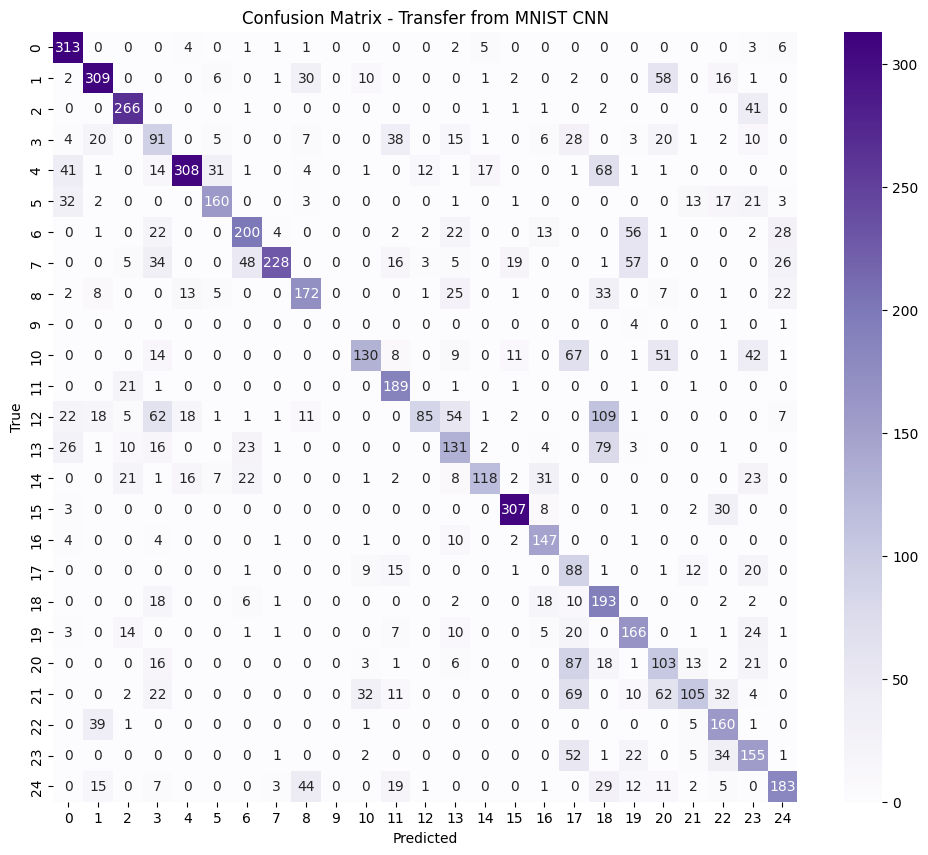

In [32]:
# STEP 1: Load and prepare MNIST
(x_mnist, y_mnist), (_, _) = tf.keras.datasets.mnist.load_data()
x_mnist = x_mnist.reshape(-1, 28, 28, 1) / 255.0
y_mnist_cat = to_categorical(y_mnist, 10)

# Build base CNN using Functional API
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
features = Dense(128, activation='relu', name="features")(x)
output = Dense(10, activation='softmax')(features)

mnist_model = Model(inputs=inputs, outputs=output)
mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train on MNIST
mnist_model.fit(x_mnist, y_mnist_cat, epochs=3, batch_size=64)

# STEP 2: Extract feature layers and freeze
feature_extractor = Model(inputs=mnist_model.input, outputs=mnist_model.get_layer("features").output)
feature_extractor.trainable = False  # Freeze the base model


X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

num_classes = 25
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# STEP 4: Build transfer model
x = feature_extractor.output
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)
transfer_model = Model(inputs=feature_extractor.input, outputs=output)

transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train on Sign Language MNIST
transfer_model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

# STEP 5: Evaluate
test_loss, test_acc = transfer_model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Metrics
y_pred = transfer_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Transfer from MNIST CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.0410 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.0390 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 47s 118ms/step - accuracy: 0.0421 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 80s 113ms/step - accuracy: 0.0420 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.0422 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.0415 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 86s 125ms/step - accuracy: 0.0410 - loss: nan - val_accuracy: 0.0433 - val_loss: nan
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 79s 119ms/step - accuracy: 0.0430 - loss: nan - val_accuracy: 0.0433 - val_loss: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


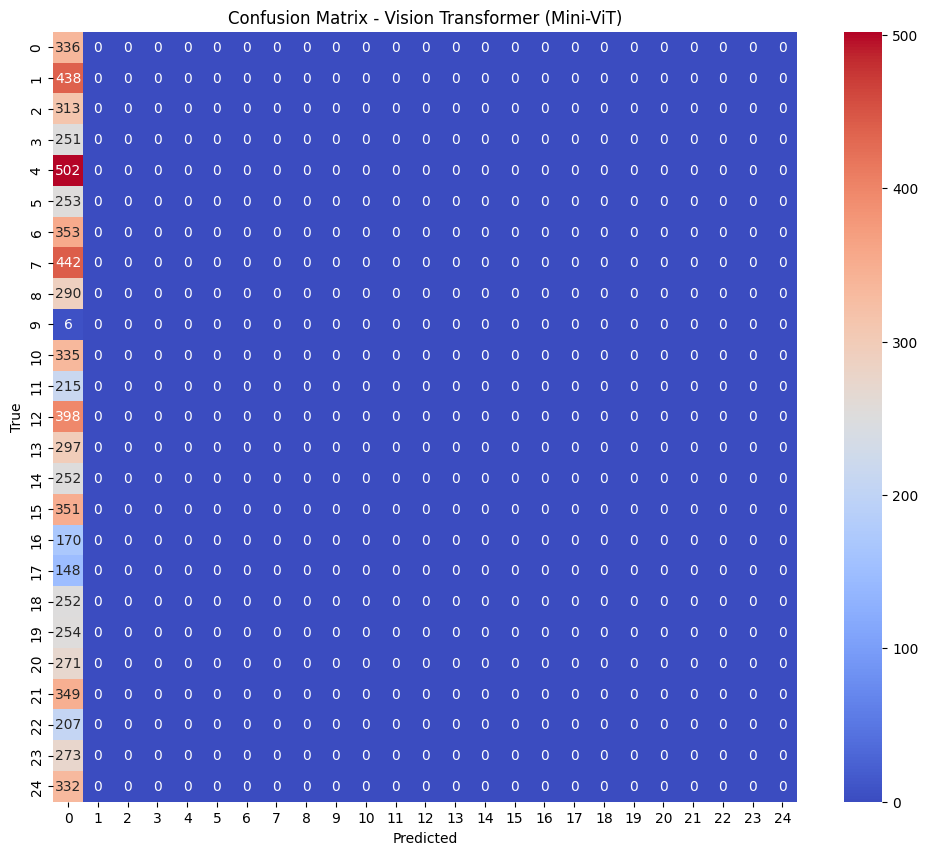

In [34]:

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

num_classes = 25
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Patch creation layer
class PatchExtractor(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Transformer Encoder block
def transformer_encoder(x, num_heads, ff_dim, dropout=0.1):
    # Layer norm 1
    x1 = LayerNormalization(epsilon=1e-6)(x)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x1, x1)
    x2 = Dropout(dropout)(attn_output)
    x = x + x2

    # Layer norm 2
    x1 = LayerNormalization(epsilon=1e-6)(x)
    ff_output = Dense(ff_dim, activation='relu')(x1)
    ff_output = Dense(x.shape[-1])(ff_output)
    x2 = Dropout(dropout)(ff_output)
    return x + x2

# Build ViT model
def build_vit(input_shape=(28, 28, 1), patch_size=4, num_heads=2, ff_dim=64, num_blocks=2, num_classes=25):
    inputs = Input(shape=input_shape)
    patches = PatchExtractor(patch_size)(inputs)

    # Linear projection
    x = Dense(ff_dim)(patches)

    # Add transformer blocks
    for _ in range(num_blocks):
        x = transformer_encoder(x, num_heads, ff_dim)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # outputs (None, 25)
    return Model(inputs, outputs)

# Create and compile
vit_model = build_vit()
vit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
vit_model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate
test_loss, test_acc = vit_model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred = vit_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Vision Transformer (Mini-ViT)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
